# Regresión Lineal

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

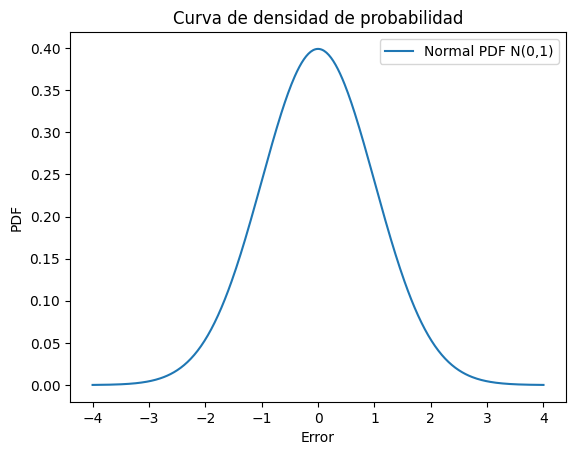

In [3]:
# Parámetros de la distribución Normal
mu = 0.0       # Media del error
sigma = 1.0    # Desviación estándar del error
# Gráfica de la curva Normal
xs = np.linspace(mu - 4*sigma, mu + 4*sigma, 400)
ys = norm.pdf(xs, loc=mu, scale=sigma)
plt.plot(xs, ys, label="Normal PDF N(0,1)")
plt.title("Curva de densidad de probabilidad")
plt.xlabel("Error")
plt.ylabel("PDF")
plt.legend()
plt.show()

## Fabricando Datos Sintéticos

In [4]:
# Parámetros del modelo
beta_0 = 2.0   # Intercepto
beta_1 = 1.5   # Pendiente
n = 20         # Número de puntos

In [8]:
# Datos y errores
rng = np.random.default_rng(42) # Generador de números aleatorios
x = np.linspace(0, 10, n)
eps = rng.normal(mu, sigma, size=n)
y = beta_0 + beta_1 * x + eps
# PDF de los errores
error_pdf = norm.pdf(eps, loc=mu, scale=sigma)

In [14]:
# Creando Dataset
df = pd.DataFrame({
    "x": x,
    "y": y,
    "error": eps,
    "error_pdf": error_pdf
})
df.head()

,x,y,error,error_pdf
0,0.000000,2.304717,0.304717,0.380844
1,0.526316,1.749490,-1.039984,0.232301
2,1.052632,4.329399,0.750451,0.301036
3,1.578947,5.308986,0.940565,0.256335
4,2.105263,3.206860,-1.951035,0.059474


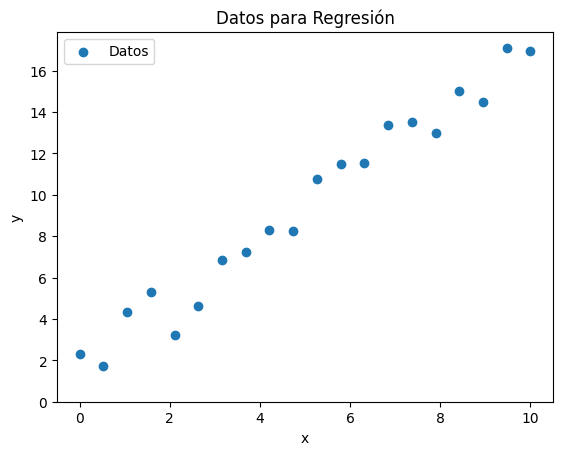

In [15]:
# Gráfica de los puntos generados
plt.scatter(x, y, label="Datos")
plt.title("Datos para Regresión")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(bottom=0)
plt.legend()
plt.show()

## Evaluando el modelo

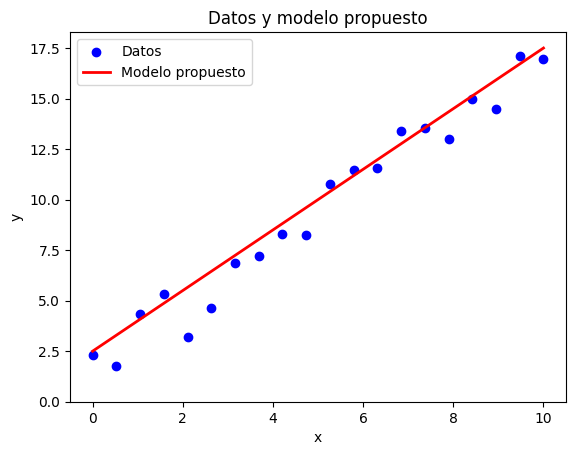

In [24]:
# Propuesta de modelo
beta_0_propuesto = 2.5   # intercepto
beta_1_propuesto = 1.5   # pendiente
y_modelo = beta_0_propuesto + beta_1_propuesto * x

# Gráfica
plt.scatter(x, y, label="Datos", color="blue")
plt.plot(x, y_modelo, label="Modelo propuesto", color="red", linewidth=2)
plt.title("Datos y modelo propuesto")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(bottom=0)
plt.legend()
plt.show()

## Error

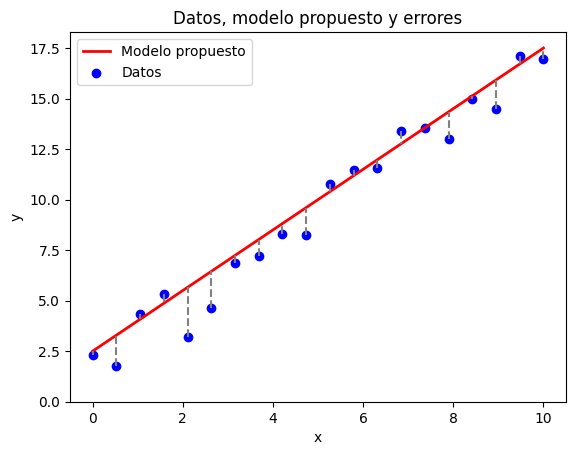

In [25]:
# Cálculo de diferencias (residuos)
errores = y - y_modelo

# Gráfica con residuos

plt.plot(x, y_modelo, label="Modelo propuesto", color="red", linewidth=2)

# Dibujar líneas verticales punteadas para cada error
for xi, yi, yhat in zip(x, y, y_modelo):
    plt.plot([xi, xi], [yi, yhat], color="gray", linestyle="--")

plt.scatter(x, y, label="Datos", color="blue")

plt.title("Datos, modelo propuesto y errores")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(bottom=0)
plt.legend()
plt.show()

In [39]:
# Errores
errores
print("Residuos:", errores)
# Suma de errores
suma_errores = np.sum(errores)
print("Suma de residuos: ",suma_errores)

Residuos: [-0.19528292 -1.53998411  0.2504512   0.44056472 -2.45103519 -1.80217951
 -0.3721596  -0.81624259 -0.51680116 -1.35304393  0.37939797  0.27779194
 -0.4339693   0.62724121 -0.03249066 -1.35929246 -0.13124922 -1.4588826
  0.3784503  -0.54992591]
Suma de residuos:  -10.658641816294363


## MSE - Mean Squared Error

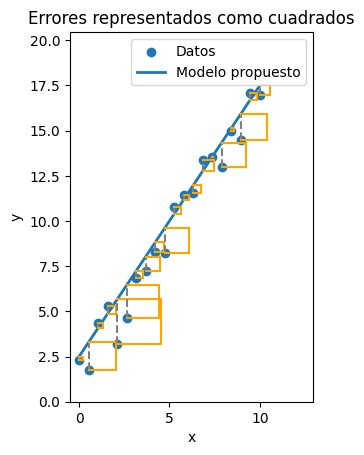

In [33]:
# Errores
err = y - y_modelo
lado_abs = np.abs(err)
lado_max = float(lado_abs.max())

# Gráfica base
plt.scatter(x, y, label="Datos")
plt.plot(x, y_modelo, label="Modelo propuesto", linewidth=2)

# Cuadrados con un lado igual al error vertical
for xi, yi, yhi, e, L in zip(x, y, y_modelo, err, lado_abs):
    y_low, y_high = (min(yi, yhi), max(yi, yhi))        # extremos del lado vertical (error)
    # lado vertical (ya es el error)
    plt.plot([xi, xi], [y_low, y_high], linestyle="--", color="gray")
    # completar el cuadrado (ejes alineados, independiente del signo)
    plt.plot([xi, xi + L], [y_high, y_high], color="orange")   # arriba
    plt.plot([xi + L, xi + L], [y_low, y_high], color="orange")# derecha
    plt.plot([xi + L, xi], [y_low, y_low], color="orange")     # abajo

plt.title("Errores representados como cuadrados")
plt.xlabel("x"); plt.ylabel("y")
plt.ylim(bottom=0)

# Visualización
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(min(x)-0.5, max(x)+lado_max+0.5)
plt.ylim(0, max(y.max(), y_modelo.max())+lado_max+0.5)

plt.legend()
plt.show()

In [40]:
# OBTENIENDO MSE
errores_cuadrados = err**2
print("Residuos al cuadrado:", errores_cuadrados)
mse = np.mean(errores_cuadrados)
print("MSE:", mse)

Residuos al cuadrado: [3.81354189e-02 2.37155105e+00 6.27258015e-02 1.94097269e-01
 6.00757350e+00 3.24785097e+00 1.38502766e-01 6.66251970e-01
 2.67083436e-01 1.83072787e+00 1.43942823e-01 7.71683594e-02
 1.88329355e-01 3.93431532e-01 1.05564284e-03 1.84767600e+00
 1.72263567e-02 2.12833844e+00 1.43224631e-01 3.02418508e-01]
MSE: 1.0033655849906047


## Encontrando la solución

In [44]:
df.head()

,x,y,error,error_pdf
0,0.000000,2.304717,0.304717,0.380844
1,0.526316,1.749490,-1.039984,0.232301
2,1.052632,4.329399,0.750451,0.301036
3,1.578947,5.308986,0.940565,0.256335
4,2.105263,3.206860,-1.951035,0.059474


Intercepto (β0): 1.7259154597741082
Pendiente (β1): 1.5482304898822348


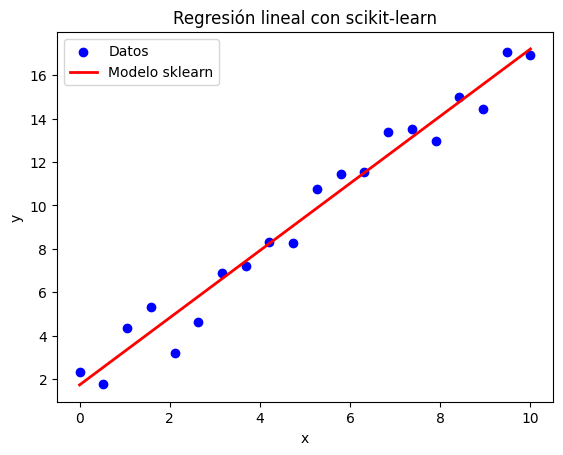

In [47]:
# sklearn espera x como matriz de 2D
X = df["x"].values.reshape(-1, 1)

# Ajustar el modelo
model = LinearRegression()
model.fit(X, y)

# Coeficientes aprendidos
b0 = model.intercept_
b1 = model.coef_[0]

print("Intercepto (β0):", b0)
print("Pendiente (β1):", b1)

# Predicciones
y_pred = model.predict(X)

# Gráfica
plt.scatter(x, y, label="Datos", color="blue")
plt.plot(x, y_pred, label="Modelo sklearn", color="red", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión lineal con scikit-learn")
plt.legend()
plt.show()